In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import r2_score

In [3]:
hour_df_backup=pd.read_csv('hour.csv')
hour_df=hour_df_backup.copy(deep=True)

In [4]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [84]:
hour_df.shape

(17379, 17)

### Data Desciption
- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [6]:
## Renaming column names...
hour_df.rename(columns={'instant':'rec_id',
'dteday':'datetime',
 'holiday':'is_holiday',
 'workingday':'is_workingday',
 'weathersit':'weather_condition',
 'hum':'humidity',
 'mnth':'month',
 'cnt':'total_count',
 'hr':'hour',
 'yr':'year'},inplace=True)

In [7]:
hour_df.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hour', 'is_holiday',
       'weekday', 'is_workingday', 'weather_condition', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rec_id             17379 non-null  int64  
 1   datetime           17379 non-null  object 
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   is_holiday         17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   is_workingday      17379 non-null  int64  
 9   weather_condition  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  total_count        173

we have to change the data types of few columns

In [11]:
#datetime Conversion
hour_df['datetime']=pd.to_datetime(hour_df['datetime'])

In [12]:
#catergorical conversion
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

In [15]:
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             17379 non-null  int64         
 1   datetime           17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   hour               17379 non-null  category      
 6   is_holiday         17379 non-null  category      
 7   weekday            17379 non-null  category      
 8   is_workingday      17379 non-null  category      
 9   weather_condition  17379 non-null  category      
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

In [32]:
hour_df.describe()

,rec_id,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Visualization

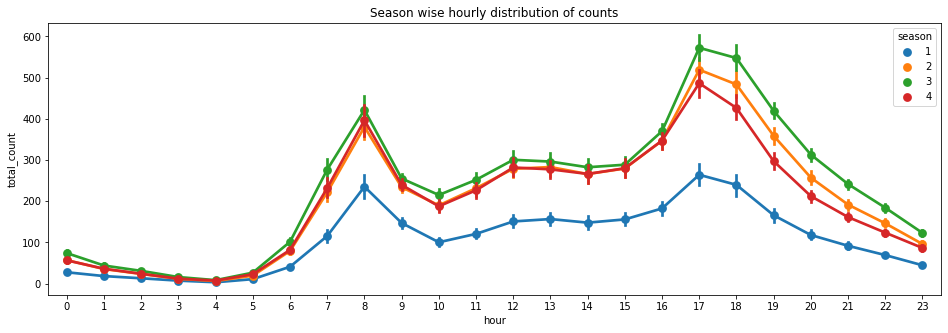

In [20]:
fig,ax=plt.subplots(figsize=(16,5))
sns.pointplot(data=hour_df[['hour','total_count','season']],
             x='hour',y='total_count',hue='season',ax=ax)
ax.set(title="Season wise hourly distribution of counts");

Shows similar trends for all seasons. Peak between 6am-8am and 4pm-6pm. high movements due to office hours.
The counts are lowest for 'Winter' season while 'Summer' sees highest count across 24 hours

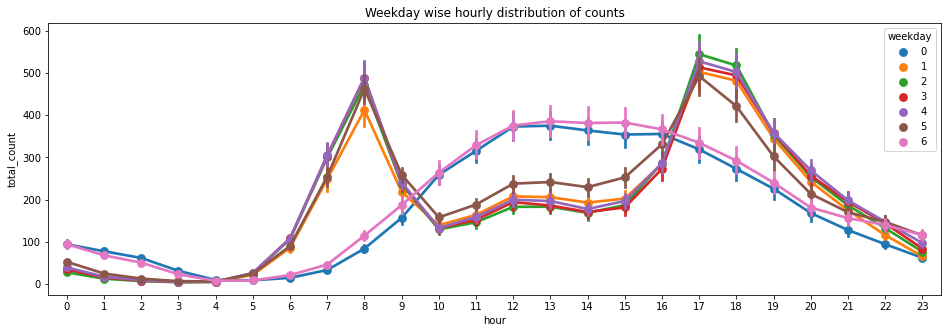

In [22]:
fig,ax=plt.subplots(figsize=(16,5))
sns.pointplot(data=hour_df[['hour','total_count','weekday']],
             x='hour',y='total_count',hue='weekday',ax=ax)
ax.set(title="Weekday wise hourly distribution of counts");

Form this graph we can see higher usage during morning and evening on weekdays and significant increase in usage during afternoon on weekends

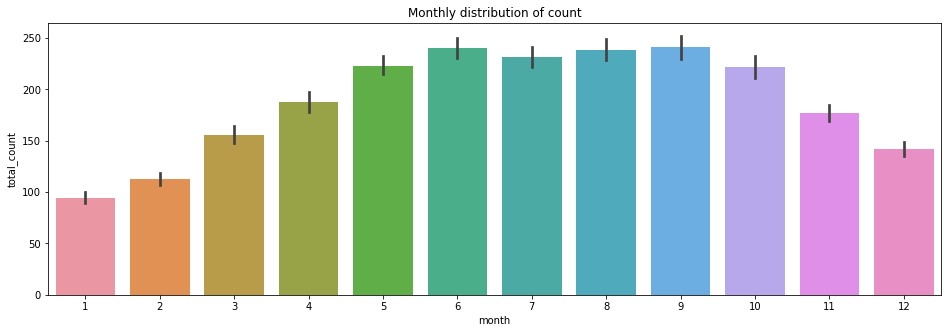

In [27]:
fig,ax=plt.subplots(figsize=(16,5))
sns.barplot(data=hour_df[['month','total_count']],x='month',y='total_count')
ax.set(title='Monthly distribution of count');

June-September is the time when usage is maximum an a year.

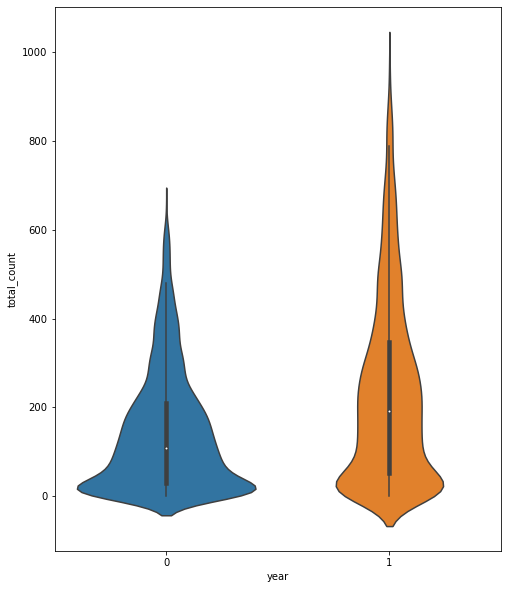

In [31]:
plt.subplots(figsize=(8,10))
sns.violinplot(data=hour_df[['year','total_count']],x='year',y='total_count')
ax.set(title='yearwise distribution');

form the graph, distribution in both 2011 and 2012 can be seen woth usage counts in 2011 having peaks at lower values as compared to 2012. The spread of counts is also much more for 2012, although the max density for both the years is between 20-200 rides.

# Handling Outliers

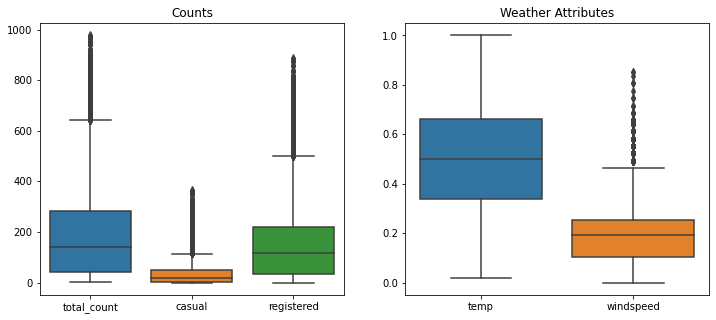

In [86]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
sns.boxplot(data=hour_df[['total_count','casual','registered']],ax=ax1)
sns.boxplot(data=hour_df[['temp','windspeed']],ax=ax2)
ax1.set_title('Counts')
ax2.set_title('Weather Attributes');

The three count attributes has sizeable number of outlires. Casual users have less outliers comparatively with other plots.
For weather attributes, windspeed has outliers.

# correlation plot

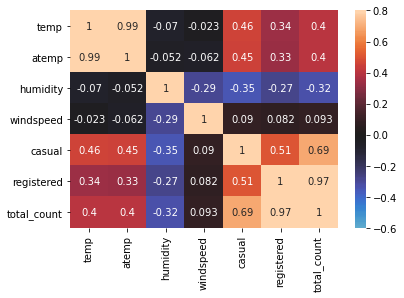

In [73]:
sns.heatmap(hour_df[['temp','atemp','humidity','windspeed','casual','registered','total_count']].corr(),annot=True,vmin=-0.6,vmax=0.8,center=0);

The two count variables, registered and casual, show obvious strong correlation to total_count.Similarly, temp and atemp show high correlation. wind_speed and humidity have slight negative correlation. Overall, none of the attributes show high correlational statistics.

In [123]:
#categorical encoding
def fit_transform_ohe(df,cat_col):
    # labelencode the column
    from sklearn.preprocessing import LabelEncoder,OneHotEncoder
    le=LabelEncoder()
    le_labels=le.fit_transform(df[cat_col])
    df[cat_col+'_label']=le_labels
    #OHE
    ohe=OneHotEncoder()
    feature_arr=ohe.fit_transform(df[[cat_col+'_label']]).toarray()
    feature_labels=[cat_col+'_'+str(c) for c in le.classes_]
    features_df=pd.DataFrame(feature_arr,columns=feature_labels)
    return features_df

In [124]:
cat_list=['season','year','month','is_holiday','weekday','is_workingday','weather_condition','hour']
for col in cat_list:
    output=fit_transform_ohe(hour_df,col)
    hour_df=pd.concat([hour_df,output],axis=1)

In [131]:
hour_df.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hour', 'is_holiday',
       'weekday', 'is_workingday', 'weather_condition', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count',
       'season_label', 'year_label', 'month_label', 'is_holiday_label',
       'weekday_label', 'is_workingday_label', 'weather_condition_label',
       'hour_label', 'season_1', 'season_2', 'season_3', 'season_4', 'year_0',
       'year_1', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'is_holiday_0', 'is_holiday_1', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'is_workingday_0', 'is_workingday_1', 'weather_condition_1',
       'weather_condition_2', 'weather_condition_3', 'weather_condition_4',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9',

In [135]:
var=['temp', 'atemp','humidity','season_1', 'season_2', 'season_3', 'season_4', 'year_0',
'year_1', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5',
'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
'month_12', 'is_holiday_0', 'is_holiday_1', 'weekday_0', 'weekday_1',
'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
'is_workingday_0', 'is_workingday_1', 'weather_condition_1',
'weather_condition_2', 'weather_condition_3', 'weather_condition_4',
'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23']

In [137]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(hour_df.loc[:,var],hour_df['total_count'],test_size=0.2,random_state=42)

# Linear Regression

In [140]:
reg=LinearRegression()
predict=cross_val_predict(reg,x_train,y_train,cv=10)

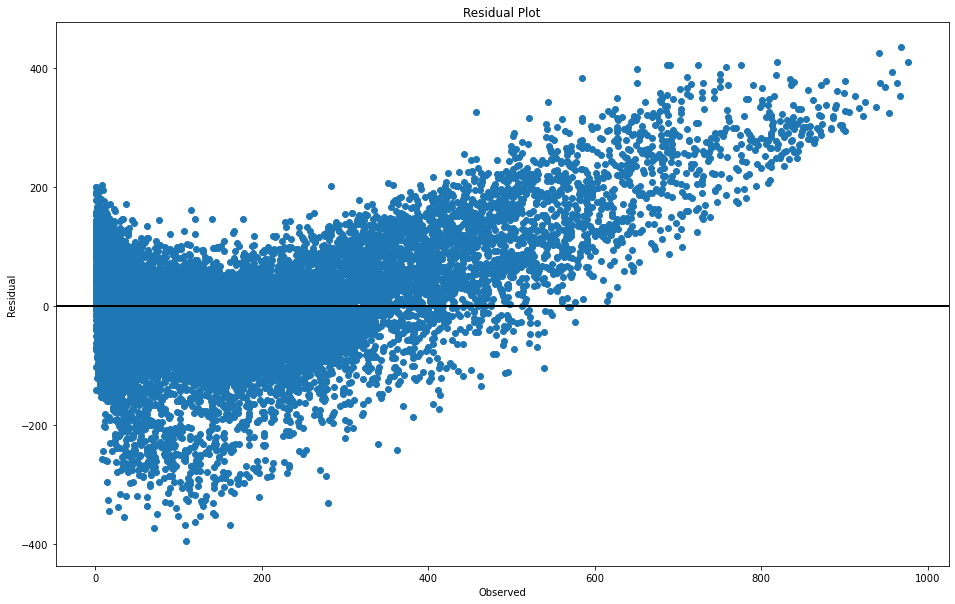

In [158]:
fig,ax=plt.subplots(figsize=(16,10))
ax.scatter(y_train,y_train-predict)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.title('Residual Plot')
plt.show()

We can see a pattern in the Residual Plot which is highly undesireable. It violates that assumptions of Linear Regression that Residuals should be *homoscedastic*.

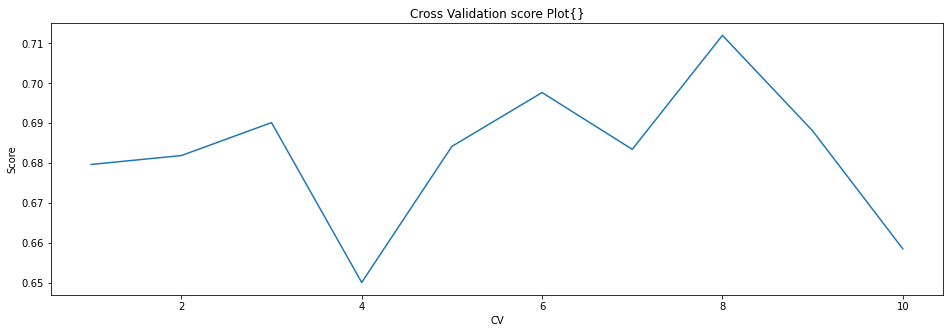

In [166]:
cv_score=cross_val_score(reg,x_train,y_train,cv=10)
fig,ax=plt.subplots(figsize=(16,5))
ax.plot(range(1,11),cv_score)
ax.set_xlabel('CV')
ax.set_ylabel('Score')
ax.title.set_text("Cross Validation score Plot{}")
plt.show()

In [175]:
r2_score_train=r2_score(y_train,predict)
print('Train R2_score= ',r2_score_train)

Train R2_score=  0.6832506283300875


In [152]:
r_square=cv_score.mean()
r_square

0.6826112321988174

In this model, the predictors are only able to explain 68.26% of the target variable

# Prediction

In [169]:
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

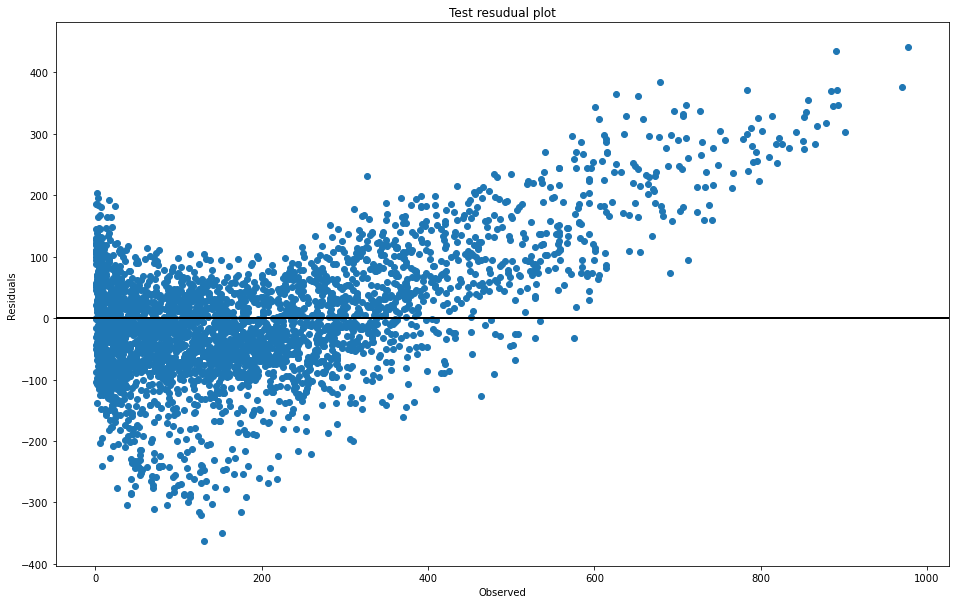

In [171]:
residual=y_test-y_pred
fig,ax=plt.subplots(figsize=(16,10))
ax.scatter(y_test,residual)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text('Test resudual plot')
plt.show()

In [174]:
r2_score_test=r2_score(y_test,y_pred)
print('TestR2_score= ',r2_score_test)

TestR2_score=  0.6810393684338981


It is clearly evident from our evaluation that the linear regression model is unable to model the data to generate decent results. Though it should be noted that the model is performing equally on both training and testing datasets. It seems like a case where we would need to model this data using methods that can model non-linear relationships.

# Decision Tree Regressor

In [176]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [177]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [185]:
# import pydotplus
# from sklearn import tree
# dot_data=tree.export_graphviz(dt, out_file=None)
# graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_pdf("bikeshare.pdf")

In [187]:
param_grid={
    "criterion": ["mse", "mae"],
    "min_samples_split": [10, 20, 40],
    "max_depth": [2, 6, 8],
    "min_samples_leaf": [20, 40, 100],
    "max_leaf_nodes": [5, 20, 100, 500, 800]
}

In [197]:
from sklearn.model_selection import GridSearchCV
grid_cv_dt=GridSearchCV(dt,param_grid,cv=5,n_jobs=-1,verbose=True)

In [ ]:
x_train.to_csv('x_train.csv')
x_test.to_csv('x_test.csv')
y_train.to_csv('_train.csv')
y_test.to_csv('x_test.csv')

In [198]:
grid_cv_dt.fit(x_train,y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   15.6s


KeyboardInterrupt: 

In [191]:
print(f"R2= {grid_cv_dt.best_score_}")
print(f"Best hyperparameteres= {grid_cv_dt.best_params_}")

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'